In [23]:
import warnings
import os
warnings.simplefilter('ignore')

os.chdir('/Users/bdemeo/Documents/bergerlab/lsh/ample/bin')
from norms import *
from dataset import *
os.chdir('/Users/bdemeo/Documents/bergerlab/lsh/ample')

In [24]:
import csv
import os
from sklearn import preprocessing

def open_data(NAMESPACE, parent_dir='data/', delimiter = '\t', dimred=True, annos = []):

    filename = 'dimred' if dimred else 'full'
    with open(parent_dir+NAMESPACE+'/'+filename+'.txt') as f:
        reader = csv.reader(f, delimiter = delimiter)
        data = np.array(list(reader)).astype(float) #assumes clean data, no column names

    result = dataset(data, path=parent_dir+NAMESPACE+'/')


    for anno in annos: #search for the indicated annotation file
        if os.path.exists(parent_dir+NAMESPACE+'/'+anno+'.txt'):
            with open(parent_dir+NAMESPACE+'/'+anno+'.txt') as f:
                reader = csv.reader(f, delimiter = delimiter)
                labels = np.array(list(reader))
                labels = [x[0] for x in labels]
                result.data[anno] = labels
        else:
            print('WARNING: could not find annotation {}'.format(anno))


    #search for subsamples
    if os.path.exists(parent_dir+NAMESPACE+'/ft.txt'):
        result.load_subsample(parent_dir+NAMESPACE+'/ft.txt', name='ft', delimiter=delimiter)


    return(result)


In [25]:
import numpy as np
import umap.umap_ as umap
from fbpca import pca
from ipywidgets import interact, interact_manual
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.metrics import pairwise_distances, adjusted_rand_score
from heapq import nlargest
from scipy.stats import spearmanr

In [4]:
zheng = open_data('zheng',annos=['labels','patients'])

In [5]:
zheng = zheng.subset('patients','P1116')

In [8]:
zheng.make_subsample('FTSampler_exact','ftreset',reset_time=10)

starting
2
3
4
5
6
7
8
9
10
starting
12
13
14
15
16
17
18
19
20
starting
22
23
24
25
26
27
28
29
30
starting
32
33
34
35
36
37
38
39
40
starting
42
43
44
45
46
47
48
49
50
starting
52
53
54
55
56
57
58
59
60
starting
62
63
64
65
66
67
68
69
70
starting
72
73
74
75
76
77
78
79
80
starting
82
83
84
85
86
87
88
89
90
starting
92
93
94
95
96
97
98
99
100
starting
102
103
104
105
106
107
108
109
110
starting
112
113
114
115
116
117
118
119
120
starting
122
123
124
125
126
127
128
129
130
starting
132
133
134
135
136
137
138
139
140
starting
142
143
144
145
146
147
148
149
150
starting
152
153
154
155
156
157
158
159
160
starting
162
163
164
165
166
167
168
169
170
starting
172
173
174
175
176
177
178
179
180
starting
182
183
184
185
186
187
188
189
190
starting
192
193
194
195
196
197
198
199
200
starting
202
203
204
205
206
207
208
209
210
starting
212
213
214
215
216
217
218
219
220
starting
222
223
224
225
226
227
228
229
230
starting
232
233
234
235
236
237
238
239
240
starting
242
243


In [10]:
zheng.make_subsample('FTSampler_exact','ft')

starting
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [7]:
zheng.make_subsample('FTSampler_exact',name='ft_pearson',distfunc=neg_pearson)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [8]:
zheng.make_subsample('FTSampler_exact',name='ft')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [9]:
zheng.subsamples['ft_pearson'].grow()

making embedding
making embedding
embedding size 818
(818, 4)


interactive(children=(IntSlider(value=409, description='N', max=818, min=1), Dropdown(description='color', opt…

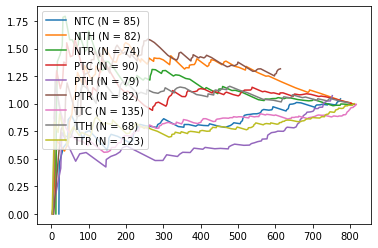

In [10]:
zheng.subsamples['ft_pearson'].plot_sampling_rate('labels')

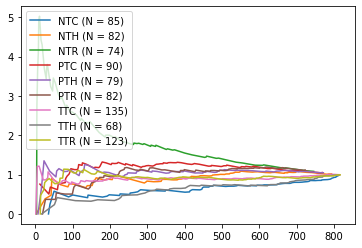

In [11]:
zheng.subsamples['ft'].plot_sampling_rate('labels')

In [9]:
zheng.gaussian_label('labels')

In [10]:
zheng.nearest_label('labels')

In [26]:
pbmc = open_data('pbmc',annos=['labels'])

In [33]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 9]

In [14]:
pbmc.load_subsample('target/experiments/pbmc_ft_pearson.txt', name='ft_pearson')

In [29]:
pbmc.load_subsample('target/experiments/pbmc_gs_5000.txt', name='gs_1000')

In [28]:
pbmc.load_subsample('target/experiments/pbmc_ft_reset30.txt', name='ft_reset30')

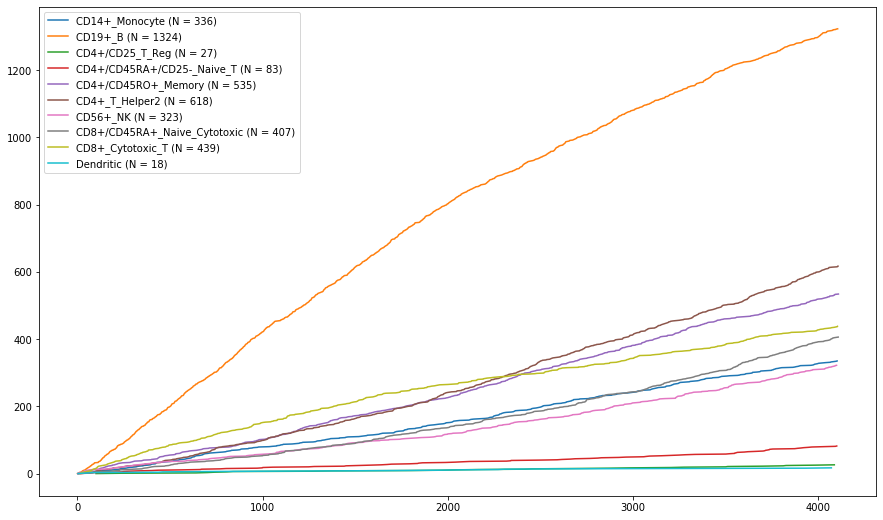

In [34]:
pbmc.subsamples['ft_reset30'].plot_sampling_rate('labels', normalize=False)

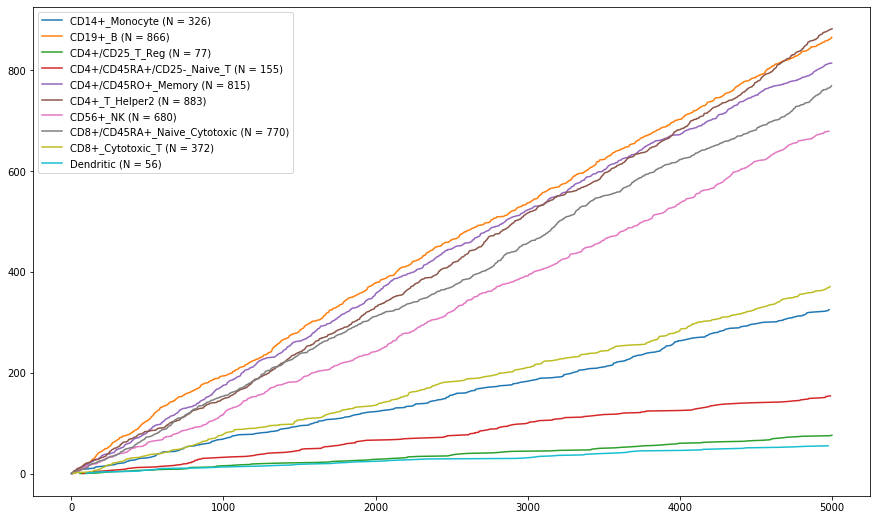

In [30]:
pbmc.subsamples['gs_1000'].plot_sampling_rate('labels',normalize=False)

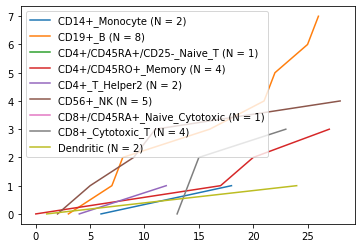

In [22]:
pbmc.subsamples['ft'][1:30].plot_sampling_rate('labels', normalize=False)

In [ ]:
jt = open_data()

In [ ]:
pbmc.subsamples['ft_pearson'][:5000].grow()

making embedding
making embedding
embedding size 5000


In [1]:
pbmc.subsamples['ft'][:2000].grow()

NameError: name 'pbmc' is not defined

In [12]:
np.mean(pbmc.data.values[:,:pbmc.numFeatures], axis=1)

array([0.00557210122946896, 0.0014393209677085964, -0.005492139075433317,
       ..., 0.0012762551418116913, 0.00018692173846899786,
       0.00030874733090472236], dtype=object)

In [7]:
pbmc.subsamples['ft_pearson'].data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,labels
68268,0.134701,-0.563849,-0.098585,-0.057090,-0.183633,0.076663,0.009549,0.093573,-0.062145,0.019764,...,0.031973,0.035986,-0.035348,-0.032199,-0.009897,0.001417,0.037008,0.032320,-0.017800,CD19+_B
32286,-0.084379,0.131539,-0.016782,-0.007484,0.054868,0.000500,0.053232,-0.061838,0.007914,-0.032542,...,-0.029370,0.039191,0.008201,-0.003345,-0.016923,0.020545,0.003611,-0.021500,-0.009694,CD8+/CD45RA+_Naive_Cytotoxic
45669,0.072613,0.022179,0.057279,-0.023561,0.051648,0.025666,-0.011090,-0.004953,0.062473,0.028021,...,-0.018560,0.007624,-0.011790,0.009591,-0.015271,-0.019711,-0.006039,-0.013569,0.018013,CD8+/CD45RA+_Naive_Cytotoxic
50346,-0.227644,-0.018734,0.150968,0.068332,-0.079416,-0.082909,-0.149108,0.011191,-0.011562,-0.045834,...,-0.009377,-0.009437,0.014434,0.026868,0.042200,0.006301,0.016091,0.002199,-0.015513,CD4+/CD45RO+_Memory
15689,0.094405,0.104731,-0.086228,-0.013803,0.004028,0.003969,-0.037069,0.012704,-0.053342,-0.030016,...,0.018477,-0.022627,-0.000131,-0.017141,-0.007816,0.007972,0.001692,-0.002857,-0.008688,CD8+/CD45RA+_Naive_Cytotoxic
58905,-0.033547,0.071027,-0.031469,-0.002621,-0.091217,-0.007145,-0.006586,0.047253,0.087308,0.084879,...,0.008148,-0.032349,-0.007323,-0.040584,-0.000443,-0.000490,-0.012498,0.013229,-0.006439,CD4+_T_Helper2
57490,0.031828,-0.000201,0.120483,-0.028232,0.078098,-0.056480,0.014167,-0.055203,-0.029053,-0.038246,...,-0.011282,0.014459,0.019489,0.018053,0.016600,0.013615,-0.010917,0.012907,-0.012280,CD4+/CD45RA+/CD25-_Naive_T
13387,0.018170,0.026630,0.004782,-0.032361,0.035509,0.002227,0.104370,0.077037,0.015061,0.004198,...,0.020260,0.007819,-0.007699,0.029688,-0.024310,0.006226,-0.017182,0.025978,0.006088,CD56+_NK
39116,0.055257,-0.023114,-0.181180,0.246497,0.076818,-0.045606,-0.036730,-0.072796,-0.002386,0.025907,...,0.016835,0.048362,-0.019338,0.026815,0.023074,0.002474,-0.000663,-0.015238,-0.018893,CD14+_Monocyte
30530,0.036606,0.042672,0.030977,0.056114,-0.031355,0.063806,0.033523,-0.072382,-0.028488,0.116141,...,0.013528,-0.009711,0.009065,0.004743,-0.000931,-0.008118,0.019496,0.008142,0.013409,CD4+_T_Helper2


In [ ]:
pbmc.make_

In [19]:
os.getcwd()

'/Users/bdemeo/Documents/bergerlab/lsh/ample'

In [58]:
plt.rcParams['figure.figsize'] = [15, 10]

In [97]:
def euclidean(x1, x2):
    return(np.linalg.norm(np.array(x1)-np.array(x2)))


In [98]:
euclidean([1,1,1],[2,3,2])

2.449489742783178